<a href="https://colab.research.google.com/github/kyoida/python-data-analysis/blob/main/ass4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 4

In [8]:

import pandas as pd
import matplotlib.pyplot as plt

url = 'https://kase.kz/en/stock_market/index_kase/'

tables = pd.read_html(url)

# here I just tryed to use pandas instead of "reqests" and "BueautifulSoup2"
# try:
#     tables = pd.read_html(url)
#     print(f"Total tables found: {len(tables)}")
#     # If tables are found, print the first table as a test
#     if len(tables) > 0:
#         print(tables[0].head())
#     else:
#         print("No tables found")
# except Exception as e:
#     print(f"An error occurred: {e}")

# here I interated through the tables of the tables and chose the one which I will work with
# for i, table in enumerate(tables):
#     print(f"Table {i}:")
#     print(table.head())  # Preview the first few rows
#     print(table.info())  # Summary information about the DataFrame
#     print(table.describe())  # Descriptive statistics for numeric columns
#     print("\n")

df = tables[2]

rename_dict = {
    'Code': 'StockCode',
    'Company': 'CompanyName',
    'Last price, KZT': 'LastPriceKZT',
    'Trend, %': 'TrendPercent',
    'Close price, KZT': 'ClosePriceKZT',
    'Weight, %': 'WeightPercent',
    'Shares, pcs': 'SharesCount',
    'Fi, %': 'FinancialIndexPercent',
    'Ri': 'RiskIndex'
}

df.rename(columns=rename_dict, inplace=True)
df['LastPriceKZT'] = df['LastPriceKZT'].str.replace(' ', '').str.replace(',', '.').astype(float)
df['SharesCount'] = df['SharesCount'].str.replace(' ', '').astype(int)
df['ClosePriceKZT'] = df['ClosePriceKZT'].str.replace(' ', '').str.replace(',', '.').astype(float)



# thsi is to list the colunms that i renamed so the table will be more structured
# print(df.columns.tolist())

print(df.head())
print("\n The Desribe command \n")
print(df.describe())







  StockCode                          CompanyName  LastPriceKZT  TrendPercent  \
0      CCBN                     Банк ЦентрКредит      86520.00             0   
1      HSBK             Народный Банк Казахстана      14964.00            -9   
2      KCEL                                Kcell       1952.00            10   
3      KEGC                                KEGOC       1565.58           133   
4      KMGZ  Национальная компания "КазМунайГаз"      11270.01           -26   

   ClosePriceKZT  WeightPercent  SharesCount  FinancialIndexPercent  RiskIndex  
0       86520.00             81    188029035                    404   10000000  
1       14964.00            149  10908273852                    305    2424567  
2        1952.00            150    200000000                    341    9083857  
3        1565.58             50    259997993                    100   10000000  
4       11270.01            148    610119493                     30    5779390  

 The Desribe command 

       La

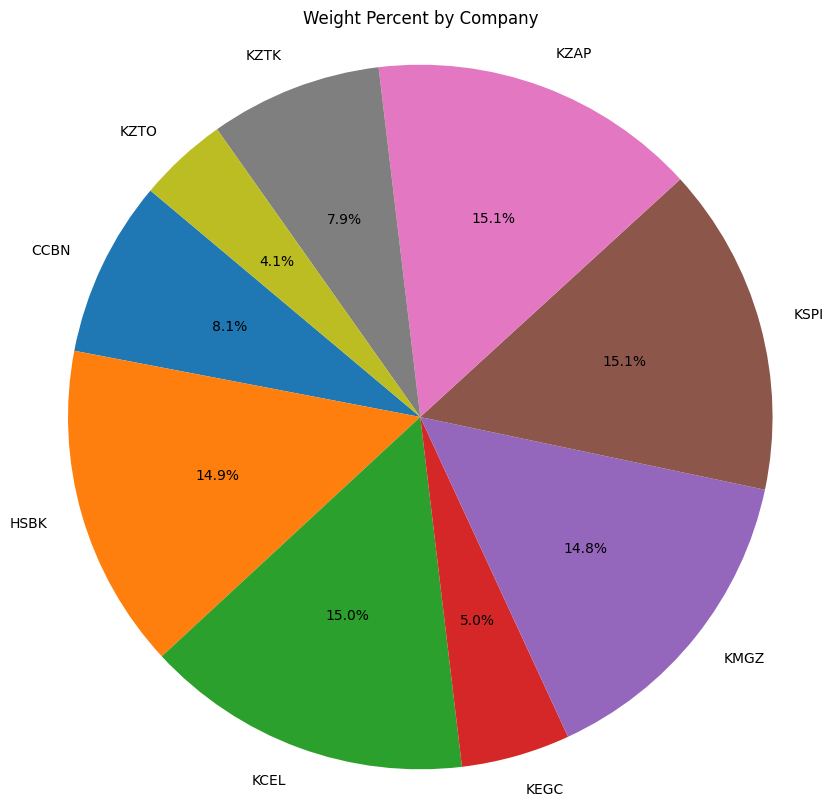

In [15]:
import matplotlib.pyplot as plt

# thw pie chart for the 'WeightPersent' column

weights = df['WeightPercent']
labels = df['StockCode']

plt.figure(figsize=(10, 10))
plt.pie(weights, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Weight Percent by Company')
plt.axis('equal')
plt.show()


rdrtd

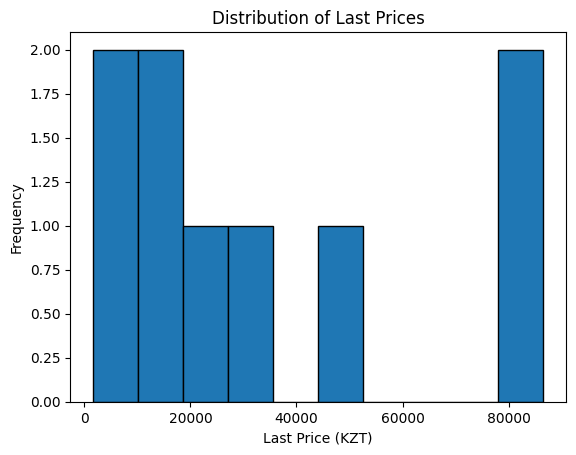

In [16]:
# a histogram for the 'LastPriceKZT' column
plt.hist(df['LastPriceKZT'], bins=10, edgecolor='black')
plt.title('Distribution of Last Prices')
plt.xlabel('Last Price (KZT)')
plt.ylabel('Frequency')
plt.show()


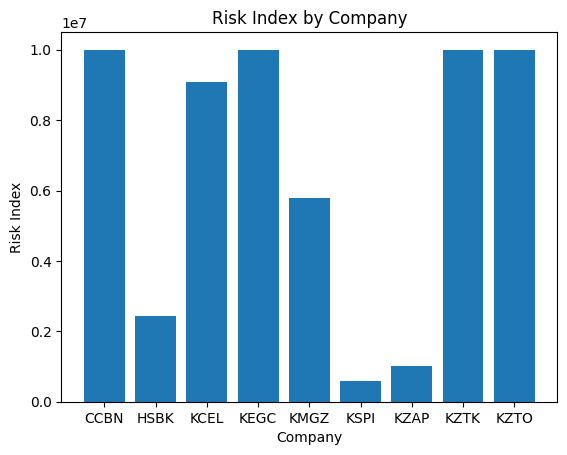

In [18]:
# a bar chart for the 'RiskIndex' column
plt.bar(df['StockCode'], df['RiskIndex'])
plt.title('Risk Index by Company')
plt.xlabel('Company')
# plt.xticks(rotation=90) this is to rotate the company names, but i renamed the company names as their code
plt.ylabel('Risk Index')
plt.show()
